## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from tqdm.notebook import tqdm
from IPython.display import clear_output
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# %load_ext autoreload
# %autoreload 2
from NN2 import *#



MIKEL


In [2]:
# Load dataset

X,Y=load_all_and_preproc()
Y = one_hot(10,Y)
X, Y, X_val, Y_val = create_val_set(X,Y)



# Test
X_test,Y_test,filenames_test = LoadBatch('test_batch')
Y_test = one_hot(10,Y_test)
X_test=preprocess(X_test)

print(X.shape,Y.shape, X_val.shape, Y_val.shape, X_test.shape,Y_test.shape)

(3072, 45000) (10, 45000) (3072, 5000) (10, 5000) (3072, 10000) (10, 10000)


In [2]:
X,Y,_ = LoadBatch('data_batch_1')
X=preprocess(X)
Y = one_hot(10,Y)

if False:
    w=25
    h=4
    X_visualize = X_train.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    visualize_multiple_images(X_visualize,h,w,True)
    
    
X_val,Y_val, _ = LoadBatch('data_batch_2')
X_val=preprocess(X_val)
Y_val = one_hot(10, Y_val)

X_test,Y_test, _ = LoadBatch('test_batch')
X_test=preprocess(X_test)
Y_test = one_hot(10, Y_test)

print(X.shape,Y.shape, X_val.shape, Y_val.shape, X_test.shape,Y_test.shape)

(3072, 10000) (10, 10000) (3072, 10000) (10, 10000) (3072, 10000) (10, 10000)


# 1) Batch normalization

## CHECKING GRADIENTS

In [3]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 20

## Network
nn = Network()
nn.add(Dense(50, n_hidden))
nn.add(BatchNorm(n_hidden))
nn.add(ReLU())

nn.add(Dense(n_hidden, n_out))
nn.add(BatchNorm(n_out))

In [4]:
test_gradients(nn,X[:50,:1200],Y[:,:1200],0.1)

LAYER: 1
Sum of relative weights error for Layer FC : 0.000127280086177513
Sum of relative betas error for Layer BN: : 1.1213113190635478e-05
Sum of relative gammas error for Layer BN: : 3.6433953528878513e-06

LAYER: 2
Sum of relative weights error for Layer FC : 3.438148687261685e-06
Sum of relative betas error for Layer BN: : 1.201243018365913e-06
Sum of relative gammas error for Layer BN: : 3.012790093956612e-08



In [457]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 20

## Network
nn = Network()
nn.add(Dense(50, n_hidden))
nn.add(BatchNorm(n_hidden))
nn.add(ReLU())

nn.add(Dense(n_hidden, n_hidden))
nn.add(BatchNorm(n_hidden))
nn.add(ReLU())

nn.add(Dense(n_hidden, n_out))
nn.add(BatchNorm(n_out))

In [458]:
test_gradients(nn,X[:50,:1200],Y[:,:1200],0.1)

LAYER: 1
Sum of relative weights error for Layer FC : 6.552163728967155e-05
Sum of relative betas error for Layer BN: : 2.421152420043049e-06
Sum of relative gammas error for Layer BN: : 7.53856764889225e-06

LAYER: 2
Sum of relative weights error for Layer FC : 1.9291068433010034e-05
Sum of relative betas error for Layer BN: : 1.2539411495296493e-06
Sum of relative gammas error for Layer BN: : 1.1830048707082187e-06

LAYER: 3
Sum of relative weights error for Layer FC : 4.285723777639723e-06
Sum of relative betas error for Layer BN: : 3.3288229888493277e-06
Sum of relative gammas error for Layer BN: : 1.1156746088136048e-08



## 3KNN without BN

Epoch 20
Train accuracy: 0.5878 Train loss: 1.1808
Val accuracy: 0.5342 Val loss: 1.3271 



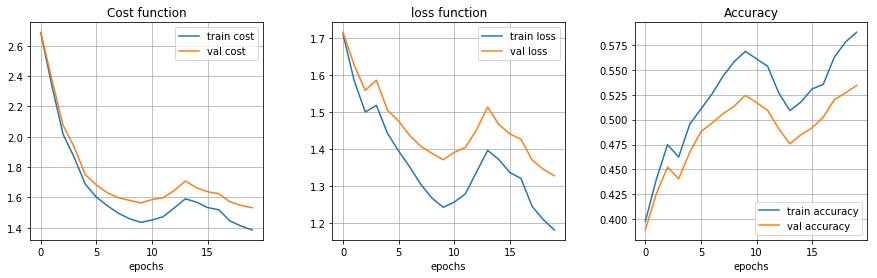


Train set accuracy: 0.5878
Validation set accuracy: 0.5342
Test set accuracy: 0.5327


In [14]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 3 KNN with BN

Epoch 20
Train accuracy: 0.6135555555555555 Train loss: 1.1070
Val accuracy: 0.5422 Val loss: 1.3083 



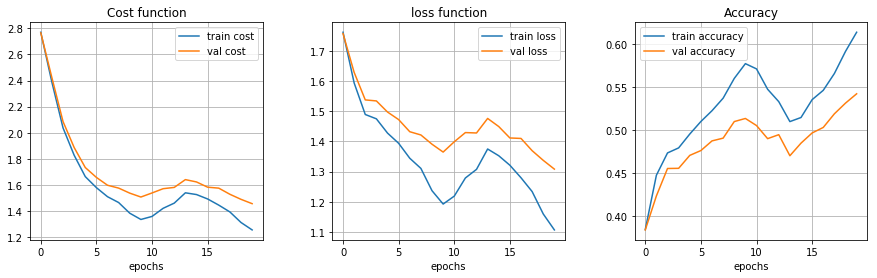


Train set accuracy: 0.6135555555555555
Validation set accuracy: 0.5422
Test set accuracy: 0.531


In [15]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN without BN

Epoch 20
Train accuracy: 0.4614 Train loss: 1.5387
Val accuracy: 0.4142 Val loss: 1.6589 



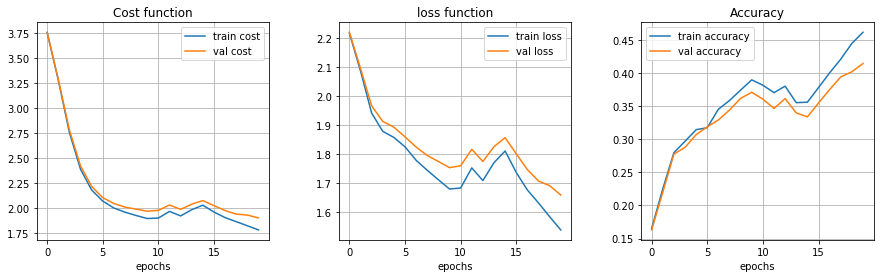


Train set accuracy: 0.4614
Validation set accuracy: 0.4142
Test set accuracy: 0.4227


In [16]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN with BN

Epoch 20
Train accuracy: 0.5206666666666667 Train loss: 1.3658
Val accuracy: 0.4646 Val loss: 1.5420 



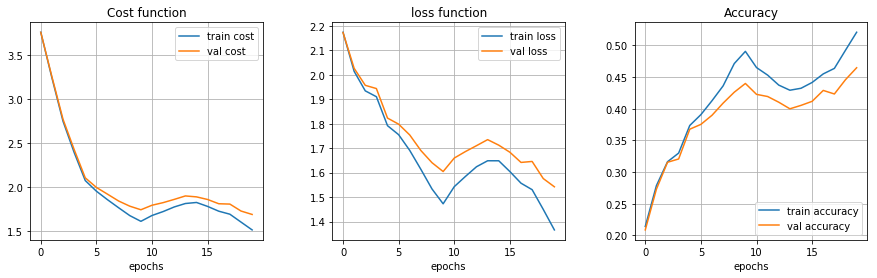


Train set accuracy: 0.5206666666666667
Validation set accuracy: 0.4646
Test set accuracy: 0.4624


In [17]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(BatchNorm(50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(BatchNorm(30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## Coarse to fine $\lambda$ tunning

### Model

Epoch 50
Train accuracy: 0.6139333333333333 Train loss: 1.0870
Val accuracy: 0.5308 Val loss: 1.3354 



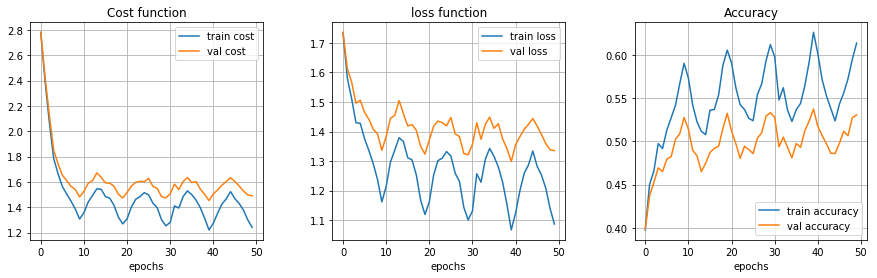


Train set accuracy: 0.6139333333333333
Validation set accuracy: 0.5308
Test set accuracy: 0.5355


In [6]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*5
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))


#Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005164, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

### Search

    Unnamed: 0     lamba  val_acc  train_acc
0            0  0.010546   0.5124   0.573711
9            9  0.005436   0.5130   0.581978
10          10  0.007411   0.5150   0.576844
1            1  0.013335   0.5168   0.564467
5            5  0.005729   0.5174   0.586444
24          24  0.013408   0.5182   0.573178
23          23  0.012872   0.5188   0.572156
18          18  0.012631   0.5190   0.570067
19          19  0.014409   0.5202   0.567978
12          12  0.013519   0.5212   0.572889
15          15  0.012716   0.5218   0.580311
25          25  0.009448   0.5230   0.581311
2            2  0.011100   0.5234   0.578156
16          16  0.005801   0.5238   0.582533
8            8  0.006469   0.5240   0.592089
13          13  0.005131   0.5242   0.590622
27          27  0.008626   0.5242   0.590578
14          14  0.007501   0.5244   0.588067
29          29  0.005130   0.5250   0.586089
6            6  0.013408   0.5252   0.570044
17          17  0.008695   0.5268   0.580378
22        

[]

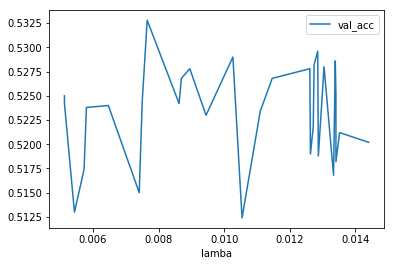

In [63]:
l_min = -5
l_max = -1

data = []
for i in tqdm(range(30)):
    l = l_min + (l_max - l_min)*np.random.rand();
    reg = 10**l;
    print(reg)
    #Train
    nn.train(X, Y, X_val, Y_val, 
             shufle = True, n_epochs=n_epochs, eta=reg, reg = reg, visualize=True, n_batch=n_batch,
             eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False)

    value = (reg,nn.accuracy(X_val,Y_val),nn.accuracy(X,Y))
    data.append(value)

column_name = ['lamba','val_acc','train_acc']
df = pd.DataFrame(data,columns=column_name)
df.to_csv("lambdas"+str(l_min)+str(l_max) +".csv")

df = df.sort_values('lamba')
print(df.sort_values('val_acc'))
df.plot(x='lamba', y='val_acc')
plt.plot()

### Visualize lambdas

    Unnamed: 0     lamba  val_acc  train_acc
0            0  0.010546   0.5124   0.573711
9            9  0.005436   0.5130   0.581978
10          10  0.007411   0.5150   0.576844
1            1  0.013335   0.5168   0.564467
5            5  0.005729   0.5174   0.586444
24          24  0.013408   0.5182   0.573178
23          23  0.012872   0.5188   0.572156
18          18  0.012631   0.5190   0.570067
19          19  0.014409   0.5202   0.567978
12          12  0.013519   0.5212   0.572889
15          15  0.012716   0.5218   0.580311
25          25  0.009448   0.5230   0.581311
2            2  0.011100   0.5234   0.578156
16          16  0.005801   0.5238   0.582533
8            8  0.006469   0.5240   0.592089
13          13  0.005131   0.5242   0.590622
27          27  0.008626   0.5242   0.590578
14          14  0.007501   0.5244   0.588067
29          29  0.005130   0.5250   0.586089
6            6  0.013408   0.5252   0.570044
17          17  0.008695   0.5268   0.580378
22        

[]

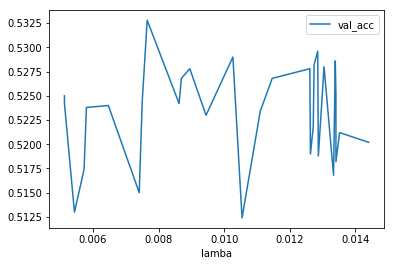

In [54]:
df =pd.read_csv('lambdas/lambdas0.0050.015.csv')
df2=df.sort_values('lamba')
print(df2.sort_values('val_acc'))

df2.plot(x='lamba', y='val_acc')
plt.plot()

## 3KNN without BN, gauss init , sig =1e-1

Epoch 20
Train accuracy: 0.5787555555555556 Train loss: 1.2083
Val accuracy: 0.5282 Val loss: 1.3412 



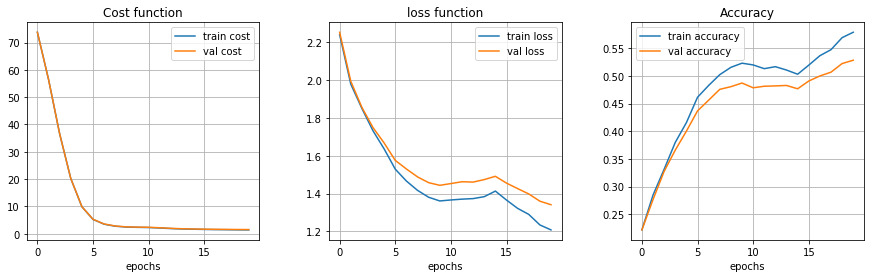


Train set accuracy: 0.5787555555555556
Validation set accuracy: 0.5282
Test set accuracy: 0.5285


In [18]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-1)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 3KNN with BN, gauss init , sig =1e-1

Epoch 20
Train accuracy: 0.5987111111111111 Train loss: 1.1320
Val accuracy: 0.5328 Val loss: 1.3237 



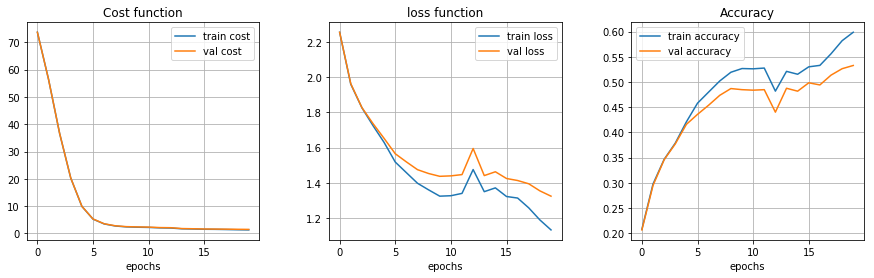


Train set accuracy: 0.5987111111111111
Validation set accuracy: 0.5328
Test set accuracy: 0.523


In [19]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-1)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 3KNN without BN, gauss init , sig =1e-3

Epoch 20
Train accuracy: 0.5898 Train loss: 1.1821
Val accuracy: 0.5332 Val loss: 1.3321 



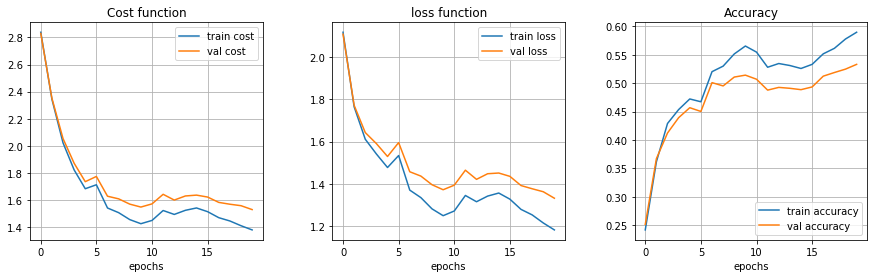


Train set accuracy: 0.5898
Validation set accuracy: 0.5332
Test set accuracy: 0.5276


In [20]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-3)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 3KNN with BN, gauss init , sig =1e-3

Epoch 20
Train accuracy: 0.6089777777777777 Train loss: 1.1173
Val accuracy: 0.5322 Val loss: 1.3275 



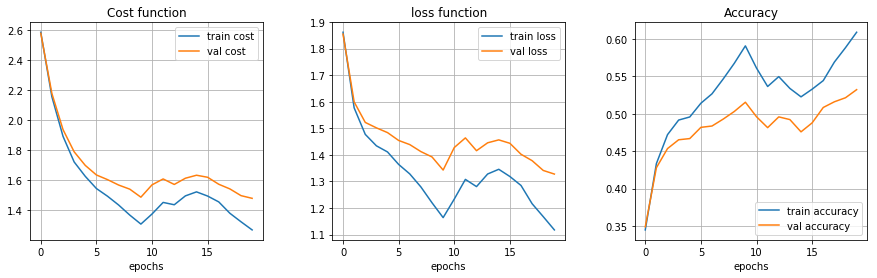


Train set accuracy: 0.6089777777777777
Validation set accuracy: 0.5322
Test set accuracy: 0.5297


In [21]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-3)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 3KNN without BN, gauss init , sig =1e-4

Epoch 20
Train accuracy: 0.15397777777777777 Train loss: 2.3023
Val accuracy: 0.1494 Val loss: 2.3023 



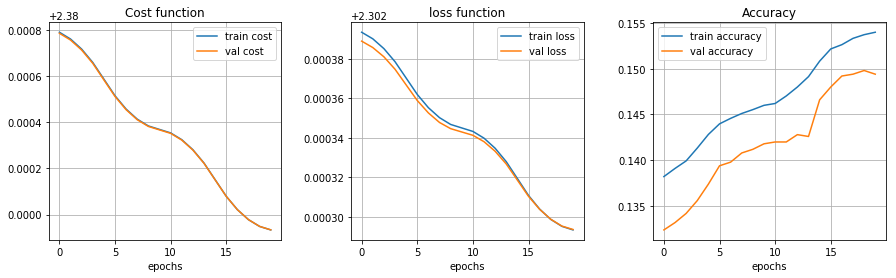


Train set accuracy: 0.15397777777777777
Validation set accuracy: 0.1494
Test set accuracy: 0.1564


In [22]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-4,n_s=n_s, augment = False, std=1e-4)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 3KNN with BN, gauss init , sig =1e-4

Epoch 20
Train accuracy: 0.6159333333333333 Train loss: 1.0906
Val accuracy: 0.5362 Val loss: 1.3085 



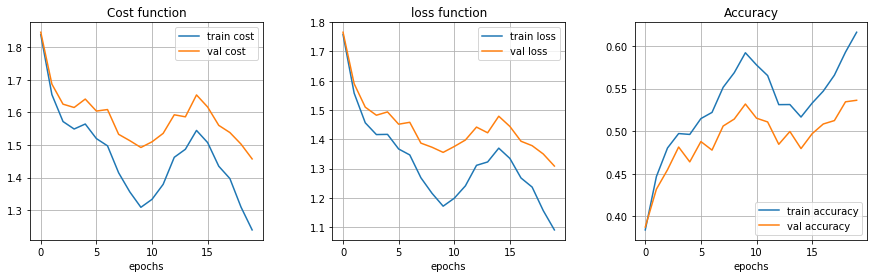


Train set accuracy: 0.6159333333333333
Validation set accuracy: 0.5362
Test set accuracy: 0.5278


In [23]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_hidden)), nn.add(BatchNorm(n_hidden)), nn.add(ReLU())
nn.add(Dense(n_hidden, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-4)

# Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN without BN gauss init, sig =1e-1

Epoch 20
Train accuracy: 0.4497333333333333 Train loss: 1.5298
Val accuracy: 0.4152 Val loss: 1.6288 



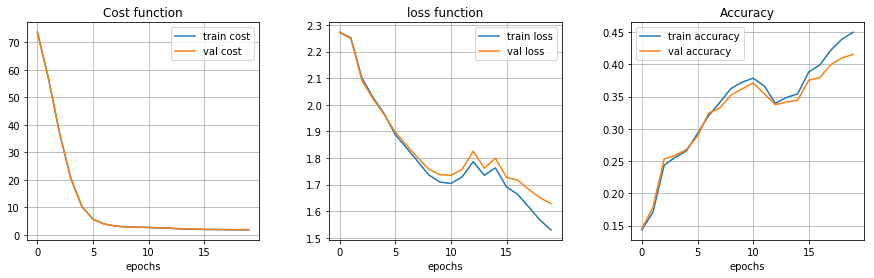


Train set accuracy: 0.4497333333333333
Validation set accuracy: 0.4152
Test set accuracy: 0.4215


In [24]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-1)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN with BN gauss init, sig =1e-1

Epoch 20
Train accuracy: 0.5566666666666666 Train loss: 1.2422
Val accuracy: 0.4904 Val loss: 1.4368 



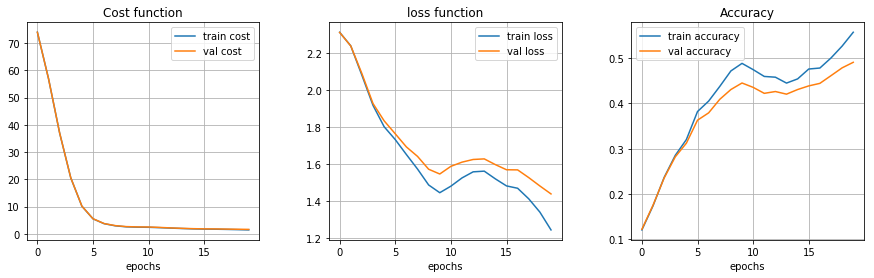


Train set accuracy: 0.5566666666666666
Validation set accuracy: 0.4904
Test set accuracy: 0.4948


In [25]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(BatchNorm(50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(BatchNorm(30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-1)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN without BN gauss init, sig =1e-3

Epoch 20
Train accuracy: 0.09988888888888889 Train loss: 2.3026
Val accuracy: 0.101 Val loss: 2.3026 



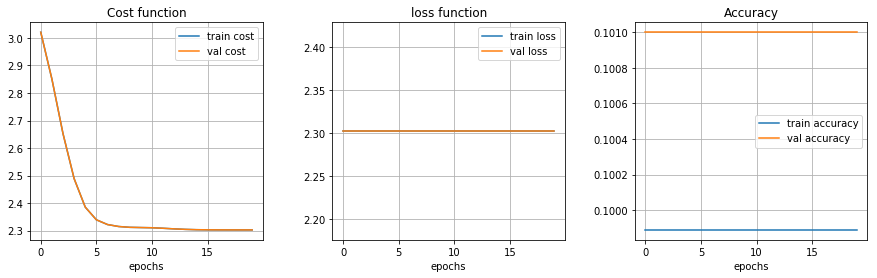


Train set accuracy: 0.09988888888888889
Validation set accuracy: 0.101
Test set accuracy: 0.1


In [26]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-3)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN with BN gauss init, sig =1e-3

Epoch 20
Train accuracy: 0.5604888888888889 Train loss: 1.2402
Val accuracy: 0.5006 Val loss: 1.4362 



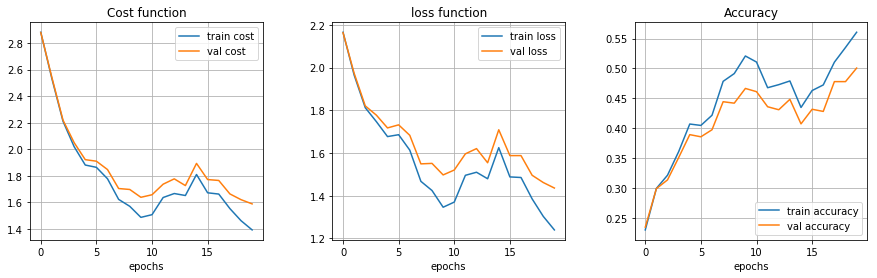


Train set accuracy: 0.5604888888888889
Validation set accuracy: 0.5006
Test set accuracy: 0.4973


In [27]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(BatchNorm(50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(BatchNorm(30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-3)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN without BN gauss init, sig =1e-4

Epoch 20
Train accuracy: 0.09988888888888889 Train loss: 2.3026
Val accuracy: 0.101 Val loss: 2.3026 



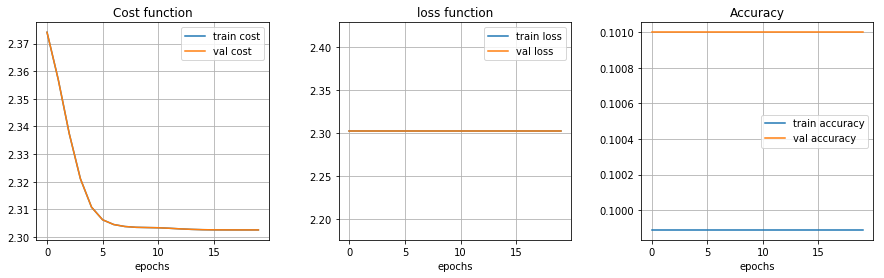


Train set accuracy: 0.09988888888888889
Validation set accuracy: 0.101
Test set accuracy: 0.1


In [28]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-4)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))

## 9 KNN with BN gauss init, sig =1e-4

Epoch 20
Train accuracy: 0.5707333333333333 Train loss: 1.2106
Val accuracy: 0.504 Val loss: 1.4021 



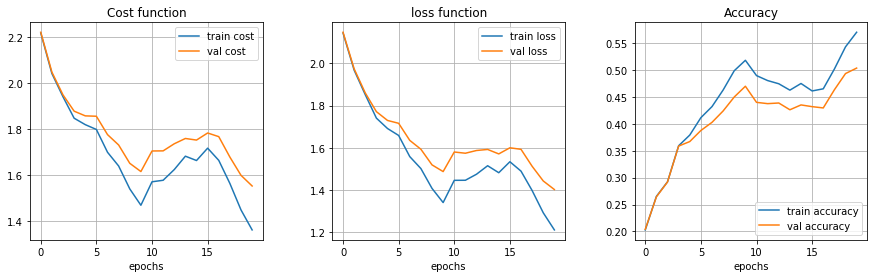


Train set accuracy: 0.5707333333333333
Validation set accuracy: 0.504
Test set accuracy: 0.5076


In [29]:
# Parameters
n_in, n = X.shape
n_out = 10
n_hidden = 50

n_batch=100
n_s = 5*n/n_batch
n_epochs = int(2*n_s*n_batch/n)*2
print(n_epochs)

## Network
nn = Network()
nn.add(Dense(n_in, 50)), nn.add(BatchNorm(50)), nn.add(ReLU())
nn.add(Dense(50, 30)), nn.add(BatchNorm(30)), nn.add(ReLU())
nn.add(Dense(30, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 20)), nn.add(BatchNorm(20)), nn.add(ReLU())
nn.add(Dense(20, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, 10)), nn.add(BatchNorm(10)), nn.add(ReLU())
nn.add(Dense(10, n_out)), nn.add(ReLU())

#nn.add(Dense(10, n_out))

##Train
nn.train(X, Y, X_val, Y_val, 
         shufle = True, n_epochs=n_epochs, eta=0.01, reg = 0.005, visualize=True, n_batch=n_batch,
         eta_min=1e-5, eta_max=1e-1,n_s=n_s, augment = False, std=1e-4)

# # Evaluate
print("Train set accuracy:",nn.accuracy(X,Y))
print("Validation set accuracy:",nn.accuracy(X_val,Y_val))
print("Test set accuracy:",nn.accuracy(X_test,Y_test))